## Groupby

In [2]:
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
Vegas = pd.read_csv('vegas.csv')
Vegas.shape

(504, 20)

In [8]:
Vegas.head()

,User country,Nr. reviews,Nr. hotel reviews,Helpful votes,Score,Period of stay,Traveler type,Pool,Gym,Tennis court,Spa,Casino,Free internet,Hotel name,Hotel stars,Nr. rooms,User continent,Member years,Review month,Review weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday


In [12]:
Vegas.columns = Vegas.columns.str.replace('.', '').str.replace(' ', '_').str.lower()
Vegas.head()

,user_country,nr_reviews,nr_hotel_reviews,helpful_votes,score,period_of_stay,traveler_type,pool,gym,tennis_court,spa,casino,free_internet,hotel_name,hotel_stars,nr_rooms,user_continent,member_years,review_month,review_weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday


In [14]:
score_by_hotel = Vegas.score.groupby(Vegas.hotel_name)
score_by_hotel

In [15]:
score_by_hotel.get_group('Circus Circus Hotel & Casino Las Vegas')

0     5
1     3
2     5
3     4
4     4
5     3
6     4
7     4
8     4
9     3
10    2
11    3
12    2
13    3
14    3
15    4
16    1
17    4
18    3
19    2
20    4
21    1
22    4
23    2
Name: score, dtype: int64

In [16]:
score_by_hotel.mean().sort_values()

hotel_name
Circus Circus Hotel & Casino Las Vegas                3.21
Monte Carlo Resort&Casino                             3.29
Excalibur Hotel & Casino                              3.71
The Westin las Vegas Hotel Casino & Spa               3.92
Hilton Grand Vacations at the Flamingo                3.96
Treasure Island- TI Hotel & Casino                    3.96
Tropicana Las Vegas - A Double Tree by Hilton Hotel   4.04
Paris Las Vegas                                       4.04
The Cromwell                                          4.08
Caesars Palace                                        4.12
Hilton Grand Vacations on the Boulevard               4.17
Bellagio Las Vegas                                    4.21
Tuscany Las Vegas Suites & Casino                     4.21
The Cosmopolitan Las Vegas                            4.25
The Palazzo Resort Hotel Casino                       4.38
Wyndham Grand Desert                                  4.38
Trump International Hotel Las Vegas          

In [17]:
score_by_hotel.min()

hotel_name
Bellagio Las Vegas                                     2
Caesars Palace                                         1
Circus Circus Hotel & Casino Las Vegas                 1
Encore at wynn Las Vegas                               1
Excalibur Hotel & Casino                               2
Hilton Grand Vacations at the Flamingo                 2
Hilton Grand Vacations on the Boulevard                1
Marriott's Grand Chateau                               3
Monte Carlo Resort&Casino                              1
Paris Las Vegas                                        2
The Cosmopolitan Las Vegas                             1
The Cromwell                                           1
The Palazzo Resort Hotel Casino                        3
The Venetian Las Vegas Hotel                           3
The Westin las Vegas Hotel Casino & Spa                2
Treasure Island- TI Hotel & Casino                     3
Tropicana Las Vegas - A Double Tree by Hilton Hotel    1
Trump International 

In [18]:
score_by_hotel.size()

hotel_name
Bellagio Las Vegas                                     24
Caesars Palace                                         24
Circus Circus Hotel & Casino Las Vegas                 24
Encore at wynn Las Vegas                               24
Excalibur Hotel & Casino                               24
Hilton Grand Vacations at the Flamingo                 24
Hilton Grand Vacations on the Boulevard                24
Marriott's Grand Chateau                               24
Monte Carlo Resort&Casino                              24
Paris Las Vegas                                        24
The Cosmopolitan Las Vegas                             24
The Cromwell                                           24
The Palazzo Resort Hotel Casino                        24
The Venetian Las Vegas Hotel                           24
The Westin las Vegas Hotel Casino & Spa                24
Treasure Island- TI Hotel & Casino                     24
Tropicana Las Vegas - A Double Tree by Hilton Hotel    24
Tru

In [19]:
by_trav_pool = Vegas.score.groupby([Vegas.traveler_type, Vegas.pool])

<Axes: xlabel='traveler_type'>

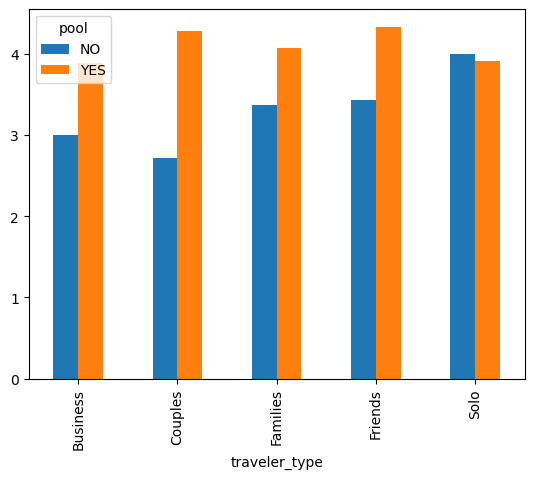

In [22]:
by_trav_pool.mean().unstack().plot(kind='bar')

In [23]:
grades = pd.Series([90,85,70,60])
studied = pd.Series([True, True, False, False])

In [25]:
grades.groupby(studied).mean()

False   65.00
True    87.50
dtype: float64

## Data Aggregation

In [26]:
Vegas.head()

,user_country,nr_reviews,nr_hotel_reviews,helpful_votes,score,period_of_stay,traveler_type,pool,gym,tennis_court,spa,casino,free_internet,hotel_name,hotel_stars,nr_rooms,user_continent,member_years,review_month,review_weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday


In [27]:
by_hotel = Vegas.groupby('hotel_name')

In [28]:
by_hotel['score'].quantile(.5)

hotel_name
Bellagio Las Vegas                                    4.50
Caesars Palace                                        4.50
Circus Circus Hotel & Casino Las Vegas                3.00
Encore at wynn Las Vegas                              5.00
Excalibur Hotel & Casino                              4.00
Hilton Grand Vacations at the Flamingo                4.00
Hilton Grand Vacations on the Boulevard               4.50
Marriott's Grand Chateau                              5.00
Monte Carlo Resort&Casino                             3.50
Paris Las Vegas                                       4.00
The Cosmopolitan Las Vegas                            5.00
The Cromwell                                          4.50
The Palazzo Resort Hotel Casino                       5.00
The Venetian Las Vegas Hotel                          5.00
The Westin las Vegas Hotel Casino & Spa               4.00
Treasure Island- TI Hotel & Casino                    4.00
Tropicana Las Vegas - A Double Tree by Hilton

In [29]:
def my_range(var):
    return np.max(var) - np.min(var)

In [30]:
by_hotel['score'].agg(my_range)

hotel_name
Bellagio Las Vegas                                     3
Caesars Palace                                         4
Circus Circus Hotel & Casino Las Vegas                 4
Encore at wynn Las Vegas                               4
Excalibur Hotel & Casino                               3
Hilton Grand Vacations at the Flamingo                 3
Hilton Grand Vacations on the Boulevard                4
Marriott's Grand Chateau                               2
Monte Carlo Resort&Casino                              4
Paris Las Vegas                                        3
The Cosmopolitan Las Vegas                             4
The Cromwell                                           4
The Palazzo Resort Hotel Casino                        2
The Venetian Las Vegas Hotel                           2
The Westin las Vegas Hotel Casino & Spa                3
Treasure Island- TI Hotel & Casino                     2
Tropicana Las Vegas - A Double Tree by Hilton Hotel    4
Trump International 

In [31]:
Vegas.score.groupby(Vegas.pool).describe()

,count,mean,std,min,25%,50%,75%,max
pool,,,,,,,,
NO,24.00,3.21,1.10,1.00,2.75,3.00,4.00,5.00
YES,480.00,4.17,0.98,1.00,4.00,4.00,5.00,5.00


In [32]:
Vegas.score.groupby(Vegas.pool).value_counts().unstack()

score,1,2,3,4,5
pool,,,,,
NO,2,4,7,9,2
YES,9,26,65,155,225


In [35]:
by_hotel['score'].agg(['mean', ('range', my_range), ('4+ score', lambda x : x.mean() > 4)])

,mean,range,4+ score
hotel_name,,,
Bellagio Las Vegas,4.21,3,True
Caesars Palace,4.12,4,True
Circus Circus Hotel & Casino Las Vegas,3.21,4,False
Encore at wynn Las Vegas,4.54,4,True
Excalibur Hotel & Casino,3.71,3,False
Hilton Grand Vacations at the Flamingo,3.96,3,False
Hilton Grand Vacations on the Boulevard,4.17,4,True
Marriott's Grand Chateau,4.54,2,True
Monte Carlo Resort&Casino,3.29,4,False


In [36]:
by_hotel[['score','member_years']].agg(['mean', my_range])

score           \
                                                    mean my_range   
hotel_name                                                          
Bellagio Las Vegas                                  4.21        3   
Caesars Palace                                      4.12        4   
Circus Circus Hotel & Casino Las Vegas              3.21        4   
Encore at wynn Las Vegas                            4.54        4   
Excalibur Hotel & Casino                            3.71        3   
Hilton Grand Vacations at the Flamingo              3.96        3   
Hilton Grand Vacations on the Boulevard             4.17        4   
Marriott's Grand Chateau                            4.54        2   
Monte Carlo Resort&Casino                           3.29        4   
Paris Las Vegas                                     4.04        3   
The Cosmopolitan Las Vegas                          4.25        4   
The Cromwell                                        4.08        4   
The Palazzo Resort Hotel Casino                     4.38        2   
The Venetian Las Vegas Hotel                        4.58        2   
The Westin las Vegas Hotel Casino & Spa             3.92        3   
Treasure Island- TI Hotel & Casino                  3.96        2   
Tropicana Las Vegas - A Double Tree by Hilton H...  4.04        4   
Trump International Hotel Las Vegas                 4.38        4   
Tuscany Las Vegas Suites & Casino                   4.21        3   
Wyndham Grand Desert                                4.38        2   
Wynn Las Vegas                                      4.62        3   

                                                   member_years           
                                                           mean my_range  
hotel_name                                                                
Bellagio Las Vegas                                         3.42       10  
Caesars Palace                                             4.75       13  
Circus Circus Hotel & Casino Las Vegas                     3.83       10  
Encore at wynn Las Vegas                                   4.75        9  
Excalibur Hotel & Casino                                   4.50       11  
Hilton Grand Vacations at the Flamingo                     3.96       10  
Hilton Grand Vacations on the Boulevard                    4.79       10  
Marriott's Grand Chateau                                   4.38       10  
Monte Carlo Resort&Casino                                  3.58        9  
Paris Las Vegas                                            3.62        9  
The Cosmopolitan Las Vegas                                 4.50       10  
The Cromwell                                               3.58       11  
The Palazzo Resort Hotel Casino                            5.29       10  
The Venetian Las Vegas Hotel                               4.38       10  
The Westin las Vegas Hotel Casino & Spa                    5.75       11  
Treasure Island- TI Hotel & Casino                       -71.04     1818  
Tropicana Las Vegas - A Double Tree by Hilton H...         3.08       10  
Trump International Hotel Las Vegas                        4.33       11  
Tuscany Las Vegas Suites & Casino                          4.71        8  
Wyndham Grand Desert                                       4.54       10  
Wynn Las Vegas                                             5.42       10

In [37]:
func_dict = {'score': 'mean', 'user_country': lambda x: (x != 'USA').mean()}

In [38]:
hotel_df = by_hotel.agg(func_dict)

In [39]:
hotel_df

,score,user_country
hotel_name,,
Bellagio Las Vegas,4.21,0.67
Caesars Palace,4.12,0.42
Circus Circus Hotel & Casino Las Vegas,3.21,0.58
Encore at wynn Las Vegas,4.54,0.42
Excalibur Hotel & Casino,3.71,0.75
Hilton Grand Vacations at the Flamingo,3.96,0.50
Hilton Grand Vacations on the Boulevard,4.17,0.58
Marriott's Grand Chateau,4.54,0.67
Monte Carlo Resort&Casino,3.29,0.75


In [41]:
by_hotel.get_group('Circus Circus Hotel & Casino Las Vegas')['pool']

0     NO
1     NO
2     NO
3     NO
4     NO
5     NO
6     NO
7     NO
8     NO
9     NO
10    NO
11    NO
12    NO
13    NO
14    NO
15    NO
16    NO
17    NO
18    NO
19    NO
20    NO
21    NO
22    NO
23    NO
Name: pool, dtype: object

In [42]:
by_hotel['pool'].first()

hotel_name
Bellagio Las Vegas                                     YES
Caesars Palace                                         YES
Circus Circus Hotel & Casino Las Vegas                  NO
Encore at wynn Las Vegas                               YES
Excalibur Hotel & Casino                               YES
Hilton Grand Vacations at the Flamingo                 YES
Hilton Grand Vacations on the Boulevard                YES
Marriott's Grand Chateau                               YES
Monte Carlo Resort&Casino                              YES
Paris Las Vegas                                        YES
The Cosmopolitan Las Vegas                             YES
The Cromwell                                           YES
The Palazzo Resort Hotel Casino                        YES
The Venetian Las Vegas Hotel                           YES
The Westin las Vegas Hotel Casino & Spa                YES
Treasure Island- TI Hotel & Casino                     YES
Tropicana Las Vegas - A Double Tree by Hilton

In [43]:
def is_unique(x):
    return len(x.unique()) == 1

In [45]:
by_hotel['pool'].agg(is_unique).all()

True

In [46]:
by_hotel.agg(is_unique).all()

user_country        False
nr_reviews          False
nr_hotel_reviews    False
helpful_votes       False
score               False
period_of_stay      False
traveler_type       False
pool                 True
gym                  True
tennis_court         True
spa                  True
casino               True
free_internet        True
hotel_stars          True
nr_rooms             True
user_continent      False
member_years        False
review_month        False
review_weekday      False
dtype: bool

In [47]:
func_dict = {'score': 'mean',
             'user_country': lambda x: (x != 'USA').mean(),
             'pool': 'first',
             'gym': 'first',
             'tennis_court': 'first',
             'spa': 'first',
             'casino': 'first',
             'free_internet': 'first',
             'hotel_stars': 'first',
             'nr_rooms': 'first'
             }

In [51]:
hotel_df = by_hotel.agg(func_dict)
hotel_df.columns = ['mean_score', 'percent_non_USA'] + list(hotel_df.columns[2:])
hotel_df

,mean_score,percent_non_USA,pool,gym,tennis_court,spa,casino,free_internet,hotel_stars,nr_rooms
hotel_name,,,,,,,,,,
Bellagio Las Vegas,4.21,0.67,YES,YES,NO,YES,YES,YES,5,3933
Caesars Palace,4.12,0.42,YES,YES,NO,YES,YES,YES,5,3348
Circus Circus Hotel & Casino Las Vegas,3.21,0.58,NO,YES,NO,NO,YES,YES,3,3773
Encore at wynn Las Vegas,4.54,0.42,YES,YES,NO,YES,YES,YES,5,2034
Excalibur Hotel & Casino,3.71,0.75,YES,YES,NO,YES,YES,YES,3,3981
Hilton Grand Vacations at the Flamingo,3.96,0.50,YES,YES,NO,NO,NO,YES,3,315
Hilton Grand Vacations on the Boulevard,4.17,0.58,YES,YES,NO,YES,YES,YES,"3,5",1228
Marriott's Grand Chateau,4.54,0.67,YES,YES,NO,NO,YES,YES,"3,5",732
Monte Carlo Resort&Casino,3.29,0.75,YES,YES,NO,YES,YES,NO,4,3003


In [52]:
hotel_df.to_csv('hotels.csv')

## Split-Apply-Combine

In [54]:
by_hotel = Vegas.groupby('hotel_name')

In [55]:
Vegas.hotel_name.unique()

array(['Circus Circus Hotel & Casino Las Vegas',
       'Excalibur Hotel & Casino', 'Monte Carlo Resort&Casino',
       'Treasure Island- TI Hotel & Casino',
       'Tropicana Las Vegas - A Double Tree by Hilton Hotel',
       'Caesars Palace', 'The Cosmopolitan Las Vegas',
       'The Palazzo Resort Hotel Casino', 'Wynn Las Vegas',
       'Trump International Hotel Las Vegas', 'The Cromwell',
       'Encore at wynn Las Vegas',
       'Hilton Grand Vacations on the Boulevard',
       "Marriott's Grand Chateau", 'Tuscany Las Vegas Suites & Casino',
       'Hilton Grand Vacations at the Flamingo', 'Wyndham Grand Desert',
       'The Venetian Las Vegas Hotel', 'Bellagio Las Vegas',
       'Paris Las Vegas', 'The Westin las Vegas Hotel Casino & Spa'],
      dtype=object)

In [56]:
sample_group = by_hotel.get_group('Circus Circus Hotel & Casino Las Vegas')

In [57]:
sample_group.head()

,user_country,nr_reviews,nr_hotel_reviews,helpful_votes,score,period_of_stay,traveler_type,pool,gym,tennis_court,spa,casino,free_internet,hotel_name,hotel_stars,nr_rooms,user_continent,member_years,review_month,review_weekday
0,USA,11,4,13,5,Dec-Feb,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,9,January,Thursday
1,USA,119,21,75,3,Dec-Feb,Business,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,3,January,Friday
2,USA,36,9,25,5,Mar-May,Families,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,2,February,Saturday
3,UK,14,7,14,4,Mar-May,Friends,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,Europe,6,February,Friday
4,Canada,5,5,2,4,Mar-May,Solo,NO,YES,NO,NO,YES,YES,Circus Circus Hotel & Casino Las Vegas,3,3773,North America,7,March,Tuesday


In [106]:
def top_reviewers(group):
    return group.sort_values(by='nr_reviews', ascending = False).iloc[:3, :5]

In [107]:
top_reviewers(sample_group)

,user_country,nr_reviews,nr_hotel_reviews,helpful_votes,score
15,New Zeland,146,17,33,4
1,USA,119,21,75,3
10,USA,102,24,58,2


In [108]:
by_hotel.apply(top_reviewers)

/var/folders/y4/kt57fxd942z3zncr4rvv6t740000gn/T/ipykernel_43586/3600539920.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  by_hotel.apply(top_reviewers)


user_country  nr_reviews  nr_hotel_reviews  \
hotel_name                                                            
Bellagio Las Vegas   447     Scotland         102                25   
                     445        Korea          77                18   
                     449          USA          62                13   
Caesars Palace       121          USA         161                33   
                     122  Puerto Rico         153                38   
...                               ...         ...               ...   
Wyndham Grand Desert 406          USA         289                28   
                     405          USA         182                24   
Wynn Las Vegas       192          USA         164                48   
                     210          USA         142                17   
                     198          USA         125                35   

                          helpful_votes  score  
hotel_name                                      
Bellagio Las Vegas   447             37      5  
                     445             48      4  
                     449             31      4  
Caesars Palace       121             85      4  
                     122             81      5  
...                                 ...    ...  
Wyndham Grand Desert 406            133      4  
                     405             47      4  
Wynn Las Vegas       192             82      5  
                     210             31      4  
                     198             48      5  

[63 rows x 5 columns]

In [71]:
def score_detail(group):
    return group.score.value_counts(normalize=True)

In [72]:
score_detail(sample_group)

score
4   0.38
3   0.29
2   0.17
5   0.08
1   0.08
Name: proportion, dtype: float64

In [75]:
by_hotel.apply(score_detail).unstack().fillna(0)

/var/folders/y4/kt57fxd942z3zncr4rvv6t740000gn/T/ipykernel_43586/3397785454.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  by_hotel.apply(score_detail).unstack().fillna(0)


score,1,2,3,4,5
hotel_name,,,,,
Bellagio Las Vegas,0.00,0.12,0.04,0.33,0.50
Caesars Palace,0.08,0.00,0.12,0.29,0.50
Circus Circus Hotel & Casino Las Vegas,0.08,0.17,0.29,0.38,0.08
Encore at wynn Las Vegas,0.04,0.00,0.04,0.21,0.71
Excalibur Hotel & Casino,0.00,0.04,0.38,0.42,0.17
Hilton Grand Vacations at the Flamingo,0.00,0.08,0.25,0.29,0.38
Hilton Grand Vacations on the Boulevard,0.04,0.08,0.04,0.33,0.50
Marriott's Grand Chateau,0.00,0.00,0.04,0.38,0.58
Monte Carlo Resort&Casino,0.04,0.21,0.25,0.42,0.08


In [76]:
by_hotel.apply(score_detail)

/var/folders/y4/kt57fxd942z3zncr4rvv6t740000gn/T/ipykernel_43586/656647050.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  by_hotel.apply(score_detail)


hotel_name            score
Bellagio Las Vegas    5       0.50
                      4       0.33
                      2       0.12
                      3       0.04
Caesars Palace        5       0.50
                              ... 
Wyndham Grand Desert  3       0.12
Wynn Las Vegas        5       0.75
                      4       0.17
                      3       0.04
                      2       0.04
Name: proportion, Length: 85, dtype: float64

In [79]:
def score_detail_2(group):
    return pd.DataFrame(group.score.value_counts(normalize=True)).T

In [80]:
score_detail_2(sample_group)

score,4,3,2,5,1
proportion,0.38,0.29,0.17,0.08,0.08


In [84]:
score_df = by_hotel.apply(score_detail_2).reset_index(level = 1, drop=True).fillna(0)

/var/folders/y4/kt57fxd942z3zncr4rvv6t740000gn/T/ipykernel_43586/3967416178.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  score_df = by_hotel.apply(score_detail_2).reset_index(level = 1, drop=True).fillna(0)


<Axes: xlabel='score', ylabel='hotel_name'>

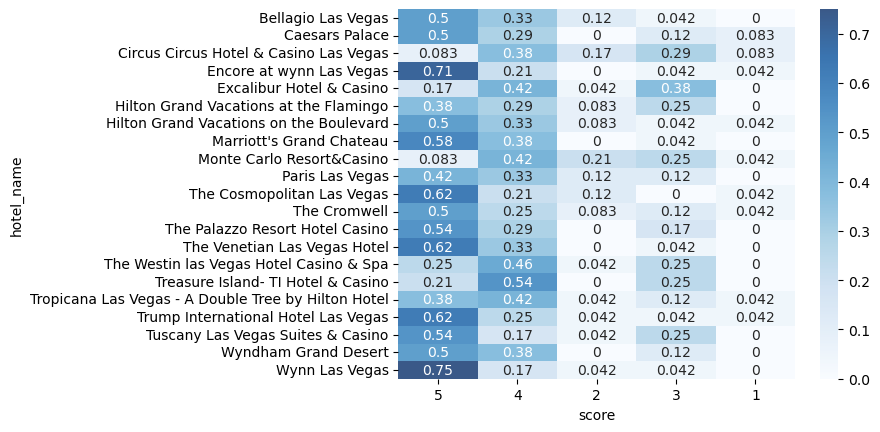

In [85]:
import seaborn as sns
sns.heatmap(score_df, annot=True, cmap='Blues', alpha=.8)

In [101]:
top_countries = Vegas.user_country.value_counts().index.values[:10]
# top_countries

def country_counts(group):
    counts =  group.user_country.value_counts(normalize=True)
    return counts.reindex(top_countries, fill_value=0)

In [102]:
country_counts(sample_group)

user_country
USA         0.42
UK          0.21
Canada      0.21
Australia   0.04
Ireland     0.00
India       0.04
Mexico      0.00
Germany     0.00
Egypt       0.00
Brazil      0.00
Name: proportion, dtype: float64

/var/folders/y4/kt57fxd942z3zncr4rvv6t740000gn/T/ipykernel_43586/590032170.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sns.heatmap(by_hotel.apply(country_counts), annot=True, cmap='Blues', alpha=.8)


<Axes: xlabel='user_country', ylabel='hotel_name'>

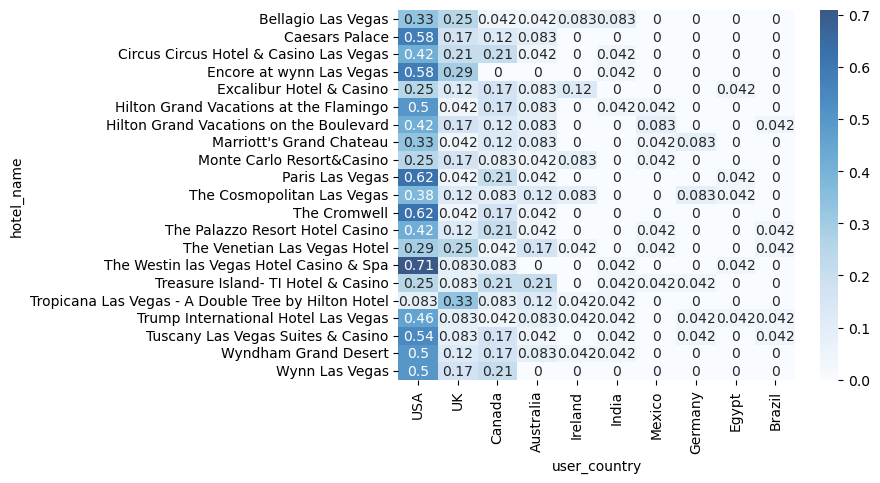

In [105]:
sns.heatmap(by_hotel.apply(country_counts), annot=True, cmap='Blues', alpha=.8)

In [110]:
# Pivot Tables and Crosstabs

H = pd.read_csv('hotels.csv', index_col='hotel_name')
H.head()

,mean_score,percent_non_USA,pool,gym,tennis_court,spa,casino,free_internet,hotel_stars,nr_rooms
hotel_name,,,,,,,,,,
Bellagio Las Vegas,4.21,0.67,YES,YES,NO,YES,YES,YES,5,3933
Caesars Palace,4.12,0.42,YES,YES,NO,YES,YES,YES,5,3348
Circus Circus Hotel & Casino Las Vegas,3.21,0.58,NO,YES,NO,NO,YES,YES,3,3773
Encore at wynn Las Vegas,4.54,0.42,YES,YES,NO,YES,YES,YES,5,2034
Excalibur Hotel & Casino,3.71,0.75,YES,YES,NO,YES,YES,YES,3,3981


In [114]:
H.pivot_table(values = 'mean_score', index=['tennis_court', 'pool'], columns=['spa', 'hotel_stars'], margins=True)

spa                 NO            YES                 All
hotel_stars          3  3,5  4,5    3  3,5    4    5     
tennis_court pool                                        
NO           NO   3.21  NaN  NaN  NaN  NaN  NaN  NaN 3.21
             YES  3.96 4.54 4.08 3.71 4.17 3.75 4.35 4.14
YES          YES   NaN 4.38  NaN 4.21  NaN 4.00 4.62 4.24
All               3.58 4.46 4.08 3.96 4.17 3.85 4.39 4.12

In [116]:
H.pivot_table(values = 'mean_score', index='tennis_court', columns='spa', aggfunc='count')

spa,NO,YES
tennis_court,,
NO,4,12
YES,1,4
